In [107]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:15pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:15pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
"""))

<font color="red" size="5">ch010 N차원 배열 다루기</font>
- [numpy](https://numpy.org/doc/stable/)
- [numpy API](https://numpy.org/doc/stable/reference/index.html)
- N차원 배열 객체
- 2차원 배열은 행렬개념
- numpy패키지는 C언어로 구현되어 고성능 수치 계산 패키지
# 1절 넘파이 패키지

In [2]:
import numpy as np
np.__version__

'1.23.5'

In [3]:
#np.arange(from, stop, step) : from부터 stop앞까지 step씩 증감한 정수값을 배열로 생성
a = np.arange(15)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

# 1.1 배열 속성

In [4]:
from numpy import arange
a = arange(15).reshape(3,5) #3행 5열짜리 2차뭔 배열로 return
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [5]:
type(a) #a변수의 타입

numpy.ndarray

In [6]:
a.dtype #a배열 요소의 타입

dtype('int32')

In [7]:
a.dtype.name

'int32'

In [8]:
a.itemsize #한 요소의 bytesize

4

In [9]:
a.ndim #차원수(축수)

2

In [10]:
a.size # 배열 요소의 갯수

15

In [11]:
a.shape #배열의 구조(튜플)

(3, 5)

## 1.2 배열 변경(구조, 타입)

In [12]:
print('구조변경 전', a, sep='\n')
a.shape = (5, 3)
print('구조변경 후', a, sep='\n')

구조변경 전
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
구조변경 후
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]


In [13]:
# 타입변경(x)
a= arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [14]:
a.dtype

dtype('int32')

In [15]:
a.itemsize

4

In [16]:
a.dtype = np.int64
a.dtype

dtype('int64')

In [17]:
a.itemsize

8

In [18]:
a.size, a.shape

(6, (3, 2))

In [19]:
a

array([[ 4294967296, 12884901890],
       [21474836484, 30064771078],
       [38654705672, 47244640266]], dtype=int64)

In [20]:
# 타입변경(O)
a= arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [21]:
a = a.astype(np.int64) #a.astype('int64')와 같음.
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [22]:
a.dtype

dtype('int64')

In [23]:
a.itemsize

8

In [24]:
a.size, a.shape

(12, (3, 4))

In [25]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [26]:
a.flatten()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [27]:
a.ravel()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

## 1.3 배열 저장

In [28]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [29]:
import pickle
with open('data/ch10_a.pkl', 'wb') as f:
    pickle.dump(a,f)

FileNotFoundError: [Errno 2] No such file or directory: 'data/ch10_a.pkl'

In [113]:
with open('data/ch10_a.pkl', 'rb') as f:
    load_a = pickle.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'data/ch10_a.pkl'

In [114]:
load_a

NameError: name 'load_a' is not defined

In [115]:
np.all(a == load_a)

NameError: name 'load_a' is not defined

In [79]:
np.save('data/ch10_a.npy',a)

FileNotFoundError: [Errno 2] No such file or directory: 'data/ch10_a.npy'

In [73]:
load _a2 = np.load('data/ch10_a.npy')
np.all(load_a2==a)

SyntaxError: invalid syntax (3664472808.py, line 1)

# 2절. 넘파이 배열
- array()함수 : 다른 파이썬 데이터 구조를 배열로 변환
- arange(), ones(), zeros()

# 2.1 array()함수로 넘파이 배열 만들기
- array(리스트나 튜플, dtype=np.xxx, copy=T/F)

In [83]:
a = np.array([2.1, 4, 6], dtype=np.int8)#정수의 기본 타입은 int32/실수의 기본 타입은 float64
a

array([2, 4, 6], dtype=int8)

In [84]:
a[0], a[1], a[2]

(2, 4, 6)

In [85]:
a.dtype

dtype('int8')

In [87]:
b = np.array([[1.3, 2.4], [4, 5]])
b

array([[1.3, 2.4],
       [4. , 5. ]])

In [88]:
b.dtype

dtype('float64')

In [92]:
b = np.array([[1.3, 2.4], [4, 5]], dtype = np.float32).reshape(1, 4)
b

array([[1.3, 2.4, 4. , 5. ]], dtype=float32)

In [93]:
b.itemsize

4

In [94]:
b.astype(np.float64)

array([[1.29999995, 2.4000001 , 4.        , 5.        ]])

In [96]:
l = [[1, 2], [3.4, 4.5]]
for row in l:
    for data in row:
        print(data, end='\t')
    print()

1	2	
3.4	4.5	


In [100]:
c = np.array([[1,2], [3.4, 4.5]], dtype=np.float16)
for i, row in enumerate(c):
    for j, item in enumerate(row):
        print("{}행 {}열: {}".format(i, j, item), end='\t')
    print()

0행 0열: 1.0	0행 1열: 2.0	
1행 0열: 3.400390625	1행 1열: 4.5	


In [102]:
c = np.array([[1,2,3,4,5], [6,7,8,9,10]], dtype=np.int16)
c

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]], dtype=int16)

In [103]:
c[0,3]

4

In [110]:
c[:,1:3] #모든행, 1열부터 3열앞까지

array([[2, 3],
       [7, 8]], dtype=int16)

In [111]:
#0행 2열~4열까지
c[0,2:]

array([3, 4, 5], dtype=int16)

In [108]:
#모든행의 맨 마지막 열만 추출
c[:,-1]

array([ 5, 10], dtype=int16)

In [109]:
#모든행의 맨 마지막 열을 제외한 추출
c[:,:-1]

array([[1, 2, 3, 4],
       [6, 7, 8, 9]], dtype=int16)

In [31]:
c = np.array([[1, 2], [3, 4]])
d = np.array(c, copy=True)# d=c.copy() 깊은복사
print('c=', c, sep='\n')
print('d=', d, sep='\n')
d[1, 0] = 3333
print('c=', c, sep='\n')
print('d=', d, sep='\n')
print('c주소={}, d주소={}'.format(id(c), id(d)))

c=
[[1 2]
 [3 4]]
d=
[[1 2]
 [3 4]]
c=
[[1 2]
 [3 4]]
d=
[[   1    2]
 [3333    4]]
c주소=1808824151536, d주소=1808825389712


## 2.2 기본값이 있는 배열만들기
- np.seros(tup):요소들이 다 0
- np.ones(tup):요소드이 다 1
- np.full(tup, 기본값): 요소들이 다 기본값
- np.empty(tup):요소들이 임의의 값(메모리 상태에 따라 달라짐)
※ 위의 함수를 이용해서 생성된 배열은 기본 dtype이 float64, dtype속성 따라 지정 가능

In [33]:
np.zeros((3,5))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [35]:
x=np.ones((3,5))
x.dtype,x

(dtype('float64'),
 array([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]]))

In [36]:
np.full((2, 5), -256)

array([[-256, -256, -256, -256, -256],
       [-256, -256, -256, -256, -256]])

In [38]:
np.empty((2,5))

array([[nan,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

## 2.3 랜덤값을 갖는 배열
- np.random.random(tup): 0부터 1미만의 균등분포를 갖는 랜덤값
- np.random.uniform(low=0,high=1.0,size=tup):low부터 high미만의 균등분포를 갖는 랜덤값
- np.random.normal(loc=0, scale=1.0, size=tup):평균loc과 표준편차scale을 갖는 정규분포 랜덤값
- np.random.rand(n): 균등분포의 1차원 난수 배열 발생(난수n개)
- np.random.randn(n): 표준정규분포(평균0, 표준편차 1인 정규분포)의 1차원 난수 배열 발생(난수 n개)
cf. random.randint(n): 0부터 n미ㅏㅁㄴ의 정수 난수 1개 발생

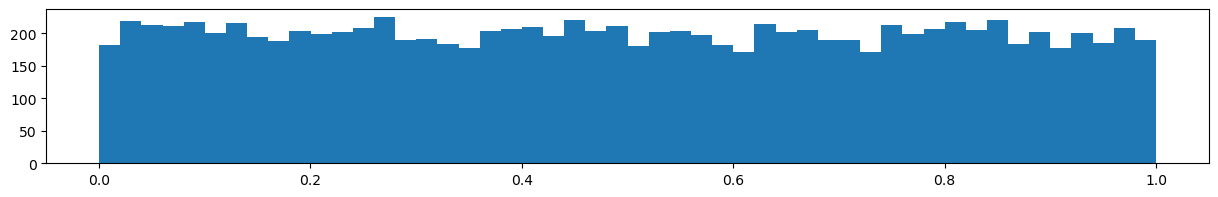

In [43]:
import matplotlib.pyplot as plt
x = np.random.rand(10000)
plt.figure(figsize=(15, 2)) #그래프 크개 figsize=(가로, 세로)
plt.hist(x, bins=50)
plt.show()

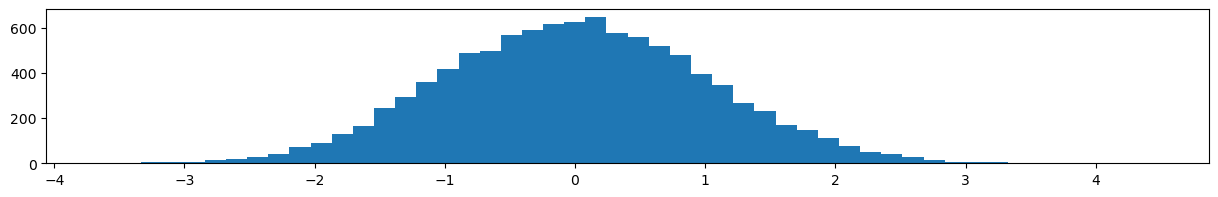

In [44]:
x = np.random.randn(10000)
plt.figure(figsize=(15, 2)) #그래프 크개 figsize=(가로, 세로)
plt.hist(x, bins=50)
plt.show()

In [47]:
#2차원 난수 배열
np.random.seed(12) #seed값을 맞추면 발생되는 난수 순서가 동일
np.random.random((2,5)) #0부터 1미만 난수 배열

array([[0.15416284, 0.7400497 , 0.26331502, 0.53373939, 0.01457496],
       [0.91874701, 0.90071485, 0.03342143, 0.95694934, 0.13720932]])

In [48]:
np.random.uniform(-1, 10, (2, 5)) #-1~10미만의 균등분포 난수 배열

array([[ 2.12211188,  5.66691503,  9.3864765 ,  8.38009095, -0.97514843],
       [ 4.7334863 ,  5.07241397,  4.33915155,  7.44947569,  0.76788428]])

In [49]:
np.random.normal(10, 2, (2, 5)) #평균10, 표준편차 2인 정규분포 난수 배열

array([[12.19191224,  7.5696624 , 12.68471274,  9.75570042, 12.02503095],
       [ 8.17226171,  7.94093959, 12.4195929 , 11.00374461, 10.27769235]])

## 2.4 연속된 값을 갖는 배열 만들기
- np.arange(from, stop, by, dtype): from부터 stop앞까지 by 씩 증감하는 정수 배열
- np.linspace(from, to, count): from부터 to까지(to포함) count개 숫자를 1차원 배열로 생성

In [50]:
np.linspace(0, 2, 20)

array([0.        , 0.10526316, 0.21052632, 0.31578947, 0.42105263,
       0.52631579, 0.63157895, 0.73684211, 0.84210526, 0.94736842,
       1.05263158, 1.15789474, 1.26315789, 1.36842105, 1.47368421,
       1.57894737, 1.68421053, 1.78947368, 1.89473684, 2.        ])

In [52]:
#linspace: 많은 수의 점들을 생성
x = np.linspace(0, 2*np.pi, 1000)
y = np.sin(x)

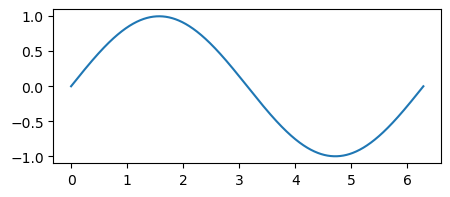

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,2))
plt.plot(x,y)
plt.show()

In [55]:
np.linspace(0, 2, 20).reshape(2,10)

array([[0.        , 0.10526316, 0.21052632, 0.31578947, 0.42105263,
        0.52631579, 0.63157895, 0.73684211, 0.84210526, 0.94736842],
       [1.05263158, 1.15789474, 1.26315789, 1.36842105, 1.47368421,
        1.57894737, 1.68421053, 1.78947368, 1.89473684, 2.        ]])

In [56]:
np.arange(10, 30, 3, dtype=np.int8)

array([10, 13, 16, 19, 22, 25, 28], dtype=int8)

## 2.5 배열의 차원 변경하기
- reshape(면수, 행수, 열수): -1이 올 수도 
- resize(면수, 행수, 열수): -1불가
- T: 전치행렬로 변환
- transpose(): 전치행렬로 변환
※ 실행결과가 출력되면 배열이 수정되지 않고, 실행결과가 없으면 배열 수정됨

In [58]:
a = np.random.random((2, 3))
a

array([[0.17756418, 0.9625969 , 0.41925027],
       [0.42405245, 0.46314887, 0.37372315]])

In [62]:
a = np.round(a*10) #round: 반올림/floor:내림/ceil:올림

In [63]:
a.reshape(3, 2)

array([[ 2., 10.],
       [ 4.,  4.],
       [ 5.,  4.]])

In [64]:
a.reshape(2, -1) #-1이 주어지면 해당 차원의 크기가 자동 계산

array([[ 2., 10.,  4.],
       [ 4.,  5.,  4.]])

In [65]:
a.reshape(6,-1)

array([[ 2.],
       [10.],
       [ 4.],
       [ 4.],
       [ 5.],
       [ 4.]])

In [66]:
a.resize((2, 3)) #결과를 출력하지 않는 함수를 배열을 바꿈. -1불가

In [67]:
a

array([[ 2., 10.,  4.],
       [ 4.,  5.,  4.]])